In [109]:
filename = 'evaluation_results/batchPayout_list_oneToMax_pushint32.csv'

In [110]:
from decimal import *
getcontext().prec = 8

In [197]:
import csv

accountsArr = []
totalFee = []
feePerAccount = []
i = 0
with open(filename) as csvfile:  
    plots = csv.reader(csvfile, delimiter = ',')
    for row in plots:
        i+=1
        if i > 1100:
            break
        if i <= 5:
            if i > 4:
                print(row)
            continue
        accountsArr.append(row[0])
        totalFee.append(float(row[3]))
        feePerAccount.append(float(row[6]))

['#accounts', 'systemfee', 'networkfee', 'totalfee', 'sysfeeperacc', 'netfeeperacc', 'totalfeeperacc']


In [195]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

In [117]:
#totalfeeArr = [sysfee + netfee for sysfee, netfee in zip(systemfeeArr, networkfeeArr)]
#totalfeeArrStr = [str(val) for val in totalfeeArr]
#print(len(totalfeeArrStr))
#print(len(accountsArr))
#print(accountsArr)

In [305]:
#accountsArr
#totalFee
#feePerAccount
#len(accountsArr)

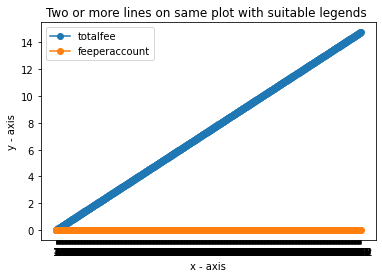

In [191]:
#plt.plot(accountsArr, feePerAccount, '*')

# plotting the line 1 points 
plt.plot(accountsArr, totalFee, label = "totalfee", marker='o')

# plotting the line 2 points 
plt.plot(accountsArr, feePerAccount, label = "feeperaccount", marker='o')
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Two or more lines on same plot with suitable legends ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#multiple plot lines for different teas
#todo: connect dots with a straight line, since it is strictly linear - explain
#plots for different teas (only two different teas, since all above result in the same fee and all below as well)
# should be connected

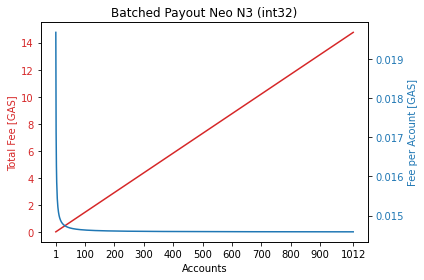

In [308]:
#accountsArr
#t = np.arange(0.00, 15.0, 0.15) # array from 0.1 to 10 with 0.01 steps

fig, ax1 = plt.subplots()
#ax1.xticks(range(50, 1012, 50))
#ax1.set_xlim(left=0, right=5)
color = 'tab:red'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Total Fee [GAS]', color=color)
ax1.plot(accountsArr, totalFee, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Fee per Acount [GAS]', color=color)  # we already handled the x-label with ax1
ax2.plot(accountsArr, feePerAccount, color=color)
ax2.tick_params(axis='y', labelcolor=color)
xaxis_ticks = np.arange(-1, 1012, 100)
xaxis_ticks[0] = 0
xaxis_ticks[len(xaxis_ticks)-1] = 1011
ax2.set(xticks=xaxis_ticks, title="Batched Payout Neo N3 (int32)")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('batchPayoutNeo.png')
plt.show()

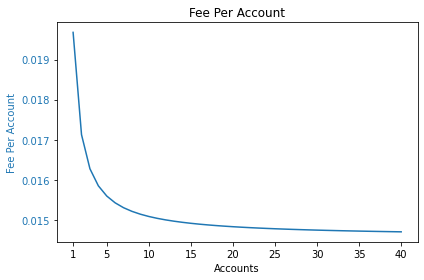

In [298]:
#accountsArr
#t = np.arange(0.00, 15.0, 0.15) # array from 0.1 to 10 with 0.01 steps

fig, ax1 = plt.subplots()
#ax1.xticks(range(50, 1012, 50))
#ax1.set_xlim(left=0, right=5)
color = 'tab:blue'
ax1.set_xlabel('Accounts')
ax1.set_ylabel('Fee Per Account', color=color)
ax1.plot(accountsArr[:40], feePerAccount[:40], color=color)
ax1.tick_params(axis='y', labelcolor=color)

xaxis_ticks = np.arange(-1, 40, 5)
xaxis_ticks[0] = 0
#xaxis_ticks[len(xaxis_ticks)-1] = 1011
ax1.set(xticks=xaxis_ticks, title="Fee Per Account")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [106]:
totalfeeperaccount = [totalfee/Decimal(accs) for totalfee, accs in zip(totalfeeArr, accountsArr)]

In [285]:
totalFee[:20]

[0.0196768,
 0.03425785,
 0.0488389,
 0.06341995,
 0.078001,
 0.09258205,
 0.1071631,
 0.12174615,
 0.1363272,
 0.15090825,
 0.1654893,
 0.18007035,
 0.1946514,
 0.20923245,
 0.2238135,
 0.23839455,
 0.2529776,
 0.26755865,
 0.2821397,
 0.29672075]